# Set up

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Load Image from Local Directory

In [2]:
# importing matplotlib modules 
import matplotlib.image as mpimg

# where to laod images
PROJECT_ROOT_DIR = "./"
IMAGE_FOLDER_DIR = "images/"  

# Output Images 
# plt.imshow(img)

def load_img(file_name="test.jpg"):
    img_loc = os.path.join(PROJECT_ROOT_DIR, IMAGE_FOLDER_DIR, file_name)
    return mpimg.imread(img_loc) 

## Display Image with Matplotlib

In [3]:
def plot_figures(images):
    rows,columns = 1,len(images)
    fig = plt.figure(figsize=(7.5,7.5))
    for i in range(1,rows * columns + 1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[i-1], cmap="gray")

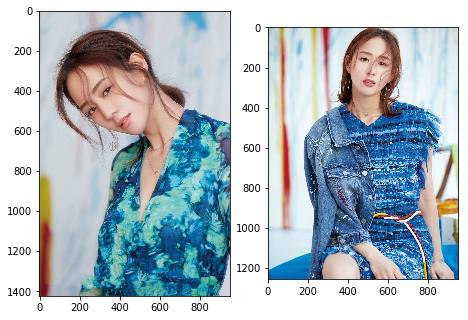

In [4]:
img = load_img("junning.jpg")
img_1 = load_img("zhang.jpg")
plot_figures([img, img_1])

**Transform a RGB image to gray image for PCA with rgb2gray**

In [5]:
from skimage.color import rgb2gray

img_gray  = rgb2gray(img)

print("original RGB image shape: " + str(img.shape))
print("Gray Shape after apply rgb2gray: " + str(img_gray.shape))

original RGB image shape: (1424, 950, 3)
Gray Shape after apply rgb2gray: (1424, 950)


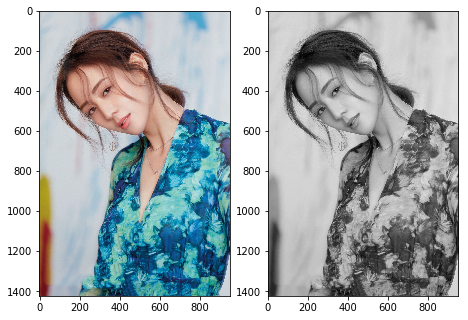

In [6]:
plot_figures([img, img_gray])

## Image Compression with PCA

**Apply PCA to grayed RGB image with n_components = 200**

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
image_reduced = pca.fit_transform(img_gray)
image_recovered = pca.inverse_transform(image_reduced)

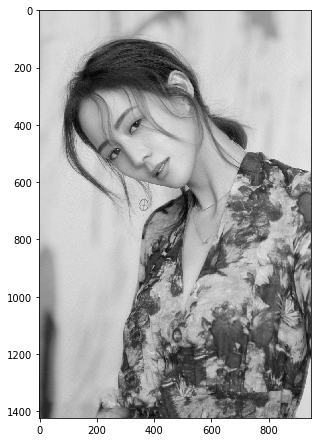

In [8]:
plot_figures([image_recovered])

**Apply PCA to images in batch**

**Class ImagePCAer can help pca an image and plot it with given components**

In [9]:
class ImagePCAer:
    def __init__(self, array_comp=[200, 100, 80, 50, 40, 30, 20, 10, 5]):
        self.array_comp = array_comp
        
    def pca_image(self, img):
        #initialize return img array
        img_after_pca = []

        #apply PCA with given components
        for i in range(len(self.array_comp)):
            pca = PCA(n_components = self.array_comp[i])
            img_reduced = pca.fit_transform(img)
            img_recovered = pca.inverse_transform(img_reduced)
            img_after_pca.append(img_recovered)
        return img_after_pca
    
    def plot_image_after_pca(self, imgs_after_pca):
        fig = plt.figure(figsize=(15,15))
        rows,columns = 3, 3

        for i in range(1,rows * columns + 1):
            axis = fig.add_subplot(rows, columns, i)
            axis.title.set_text('n_components = ' + str(self.array_comp[i-1]))
            plt.imshow(imgs_after_pca[i-1], cmap="gray")

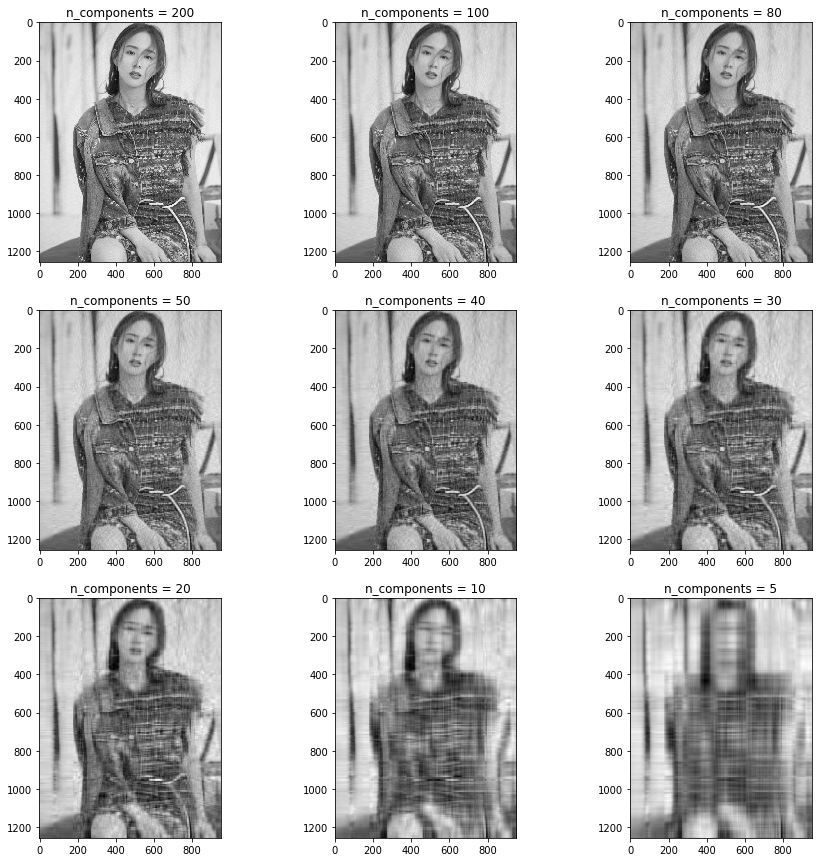

In [10]:
# image to be PCAed
img_gray = rgb2gray(img_1)

image_PCAer = ImagePCAer()
imgs_after_pca = image_PCAer.pca_image(img_gray)
image_PCAer.plot_image_after_pca(imgs_after_pca)

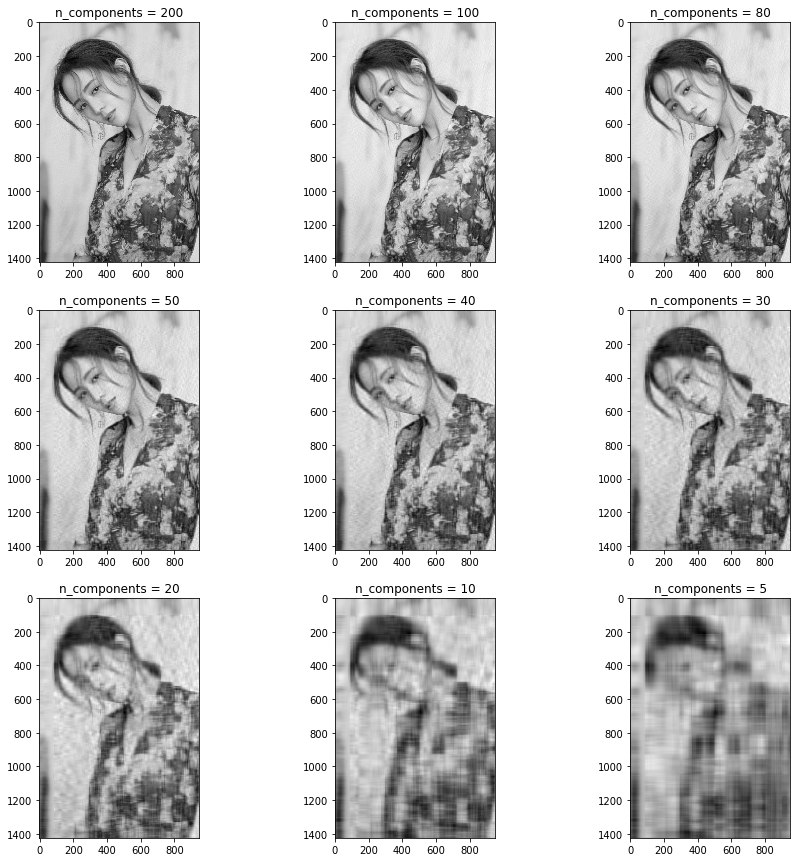

In [11]:
img_gray2 = rgb2gray(img)

imgs_after_pca2 = image_PCAer.pca_image(img_gray2)
image_PCAer.plot_image_after_pca(imgs_after_pca2)